In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

In [10]:
uploaded = files.upload()

Saving load_data.csv to load_data (1).csv


In [11]:
df = pd.read_csv("load_data.csv")

df.columns = df.columns.str.strip()

df['Date_Time'] = pd.to_datetime(df['Date_Time'], errors='coerce')

df = df.dropna(subset=['Date_Time'])

df = df.sort_values('Date_Time')
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day

In [12]:
df.drop('Date_Time', axis=1, inplace=True)

label_encoder = LabelEncoder()
df['Load_Type'] = label_encoder.fit_transform(df['Load_Type'])

last_month = df['Month'].max()
train_df = df[df['Month'] < last_month]
test_df = df[df['Month'] == last_month]

X_train = train_df.drop('Load_Type', axis=1)
y_train = train_df['Load_Type']
X_test = test_df.drop('Load_Type', axis=1)
y_test = test_df['Load_Type']


Classification Report:

              precision    recall  f1-score   support

  Light_Load       0.97      0.93      0.95       536
Maximum_Load       0.94      0.88      0.91       264
 Medium_Load       0.85      0.94      0.89       352

    accuracy                           0.92      1152
   macro avg       0.92      0.92      0.92      1152
weighted avg       0.93      0.92      0.92      1152


Confusion Matrix:


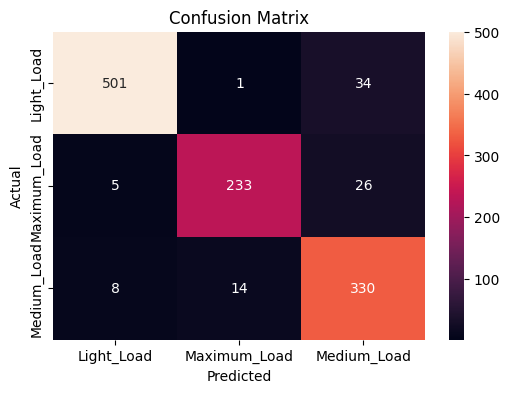

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("\nConfusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()